## Yoga body posture

Train a algorithm to identify body positions and classify them to yoga postures.

Dataset can be ownloaded [here](https://www.kaggle.com/datasets/niharika41298/yoga-poses-dataset) and should be downloaded in `./DATASET`

Based on [this tutorial](https://www.analyticsvidhya.com/blog/2021/10/human-pose-estimation-using-machine-learning-in-python/)

In [9]:
!pip install mediapipe
!pip install sklearn
!pip install pandas
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import sklearn
import os

You should consider upgrading via the '/Users/tommy/dev/datascience/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/tommy/dev/datascience/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/tommy/dev/datascience/env/bin/python3 -m pip install --upgrade pip' command.


In [10]:
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils # For drawing keypoints
points = mpPose.PoseLandmark # Landmarks
path = "DATASET/TRAIN/plank" # enter dataset path
data = []
for p in points:
        x = str(p)[13:]
        data.append(x + "_x")
        data.append(x + "_y")
        data.append(x + "_z")
        data.append(x + "_vis")
data = pd.DataFrame(columns = data) # Empty dataset


In [11]:
count = 0
for img in os.listdir(path):
        temp = []
        img = cv2.imread(path + "/" + img)
        imageWidth, imageHeight = img.shape[:2]
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        blackie = np.zeros(img.shape) # Blank image
        results = pose.process(imgRGB)
        if results.pose_landmarks:
                # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image
                mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie
                landmarks = results.pose_landmarks.landmark
                for i,j in zip(points,landmarks):
                        temp = temp + [j.x, j.y, j.z, j.visibility]
                data.loc[count] = temp
                count +=1
        # cv2.imshow("Image", img)
        # cv2.imshow("blackie",blackie)
        # cv2.waitKey(10)
data.to_csv("dataset3.csv") # save the data as a csv file

(229, 134)
(229, 132)
(229,)


/Users/tommy/dev/datascience/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 264 features, but SVC is expecting 132 features as input.

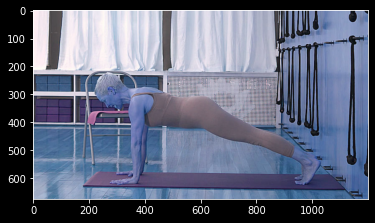

In [12]:
# add virtual target column
from matplotlib import pyplot as plt

data = pd.read_csv("dataset3.csv")
column = []
for val in range(len(data)):
	if(val < len(data) / 2):
		column.append(0)
	else:
		column.append(1)

from sklearn.svm import SVC

data['target'] = column

X,Y = data.iloc[:,:132],data['target']
print(data.shape)
print(X.shape)
print(Y.shape)
model = SVC(kernel = 'poly')
model.fit(X,Y)
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils
path = "./DATASET/TRAIN/plank/00000140.jpg"
img = cv2.imread(path)
cv2.imshow("image",img)
plt.imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = pose.process(img)
if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        for j in landmarks:
                temp = temp + [j.x, j.y, j.z, j.visibility]
        y = model.predict([temp])
        if y == 0:
            asan = "plank"
        else:
            asan = "goddess"
        print(asan)
        cv2.putText(img, asan, (50,50), cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),3)
        cv2.imshow("image",img)